# REPORTING LAYER

### Creating Fact and Dimension Table

In [50]:
import pandas as pd

### Fact Table

In [51]:
fact_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Prep\prep_scores.csv')

output_file = r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\fact_scores.csv'

fact_df.to_csv(output_file, index=False)

print(f"Scores Fact Table saved to '{output_file}'.")


Scores Fact Table saved to 'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\fact_scores.csv'.


### Dimension Tables

In [52]:
dim_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Prep\prep_employees.csv')

output_file = r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_employees.csv'

dim_df.to_csv(output_file, index=False)

print(f"Employee Dimension Table saved to '{output_file}'.")


Employee Dimension Table saved to 'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_employees.csv'.


In [53]:
dim_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Prep\prep_trainings.csv')

output_file = r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_trainings.csv'

dim_df.to_csv(output_file, index=False)

print(f"Training Dimension Table saved to '{output_file}'.")


Training Dimension Table saved to 'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_trainings.csv'.


### Few Visualizations

In [54]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### Displaying Top and Bottom 10 performers

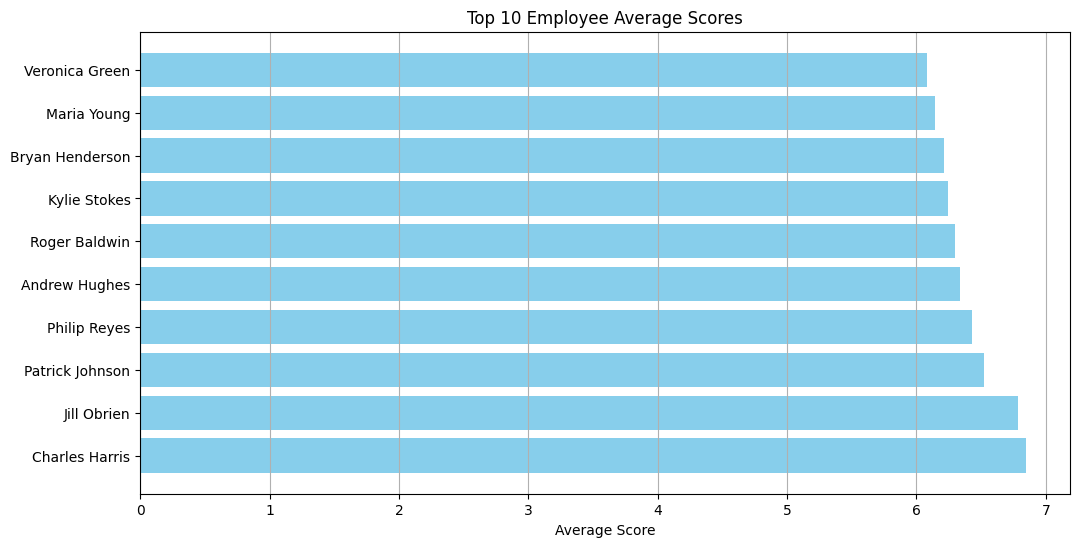

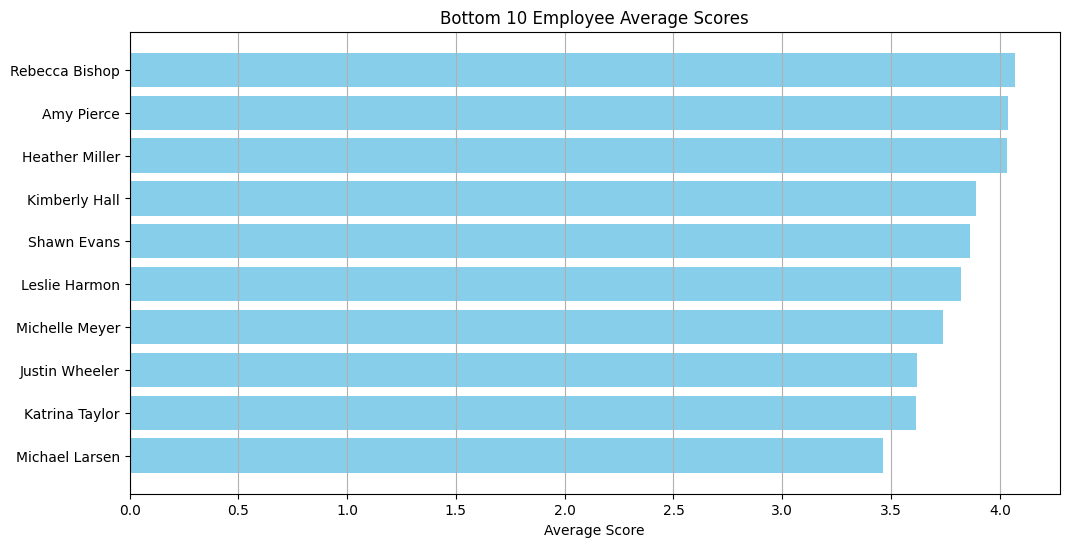

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
employees_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_employees.csv')
scores_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\fact_scores.csv')
training_df = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Reporting\dim_trainings.csv')

# Calculate average score, punctuality, discipline, and standards for each employee
avg_performance = scores_df.groupby('Emp_id').agg({
    'score': 'mean',
    'punctuality': 'mean',
    'discipline': 'mean',
    'standards': 'mean'
}).reset_index()

# Merge with employees DataFrame to get employee names and roles
performance_metrics = avg_performance.merge(employees_df[['Emp_id', 'name', 'Role']], left_on='Emp_id', right_on='Emp_id', how='left')

performance_metrics.rename(columns={
    'score': 'Average Score',
    'punctuality': 'Average Punctuality',
    'discipline': 'Average Discipline',
    'standards': 'Average Standards',
    'name': 'Employee Name',
    'Role': 'Employee Role'
}, inplace=True)

# Get top 10 and bottom 10 performers
top_performers = performance_metrics.nlargest(10, 'Average Score')
bottom_performers = performance_metrics.nsmallest(10, 'Average Score')


plt.figure(figsize=(12, 6))
plt.barh(top_performers['Employee Name'], top_performers['Average Score'], color='skyblue')
plt.xlabel('Average Score')
plt.title('Top 10 Employee Average Scores')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(bottom_performers['Employee Name'], bottom_performers['Average Score'], color='skyblue')
plt.xlabel('Average Score')
plt.title('Bottom 10 Employee Average Scores')
plt.grid(axis='x')
plt.show()



### Gender Distribution

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\3009821994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


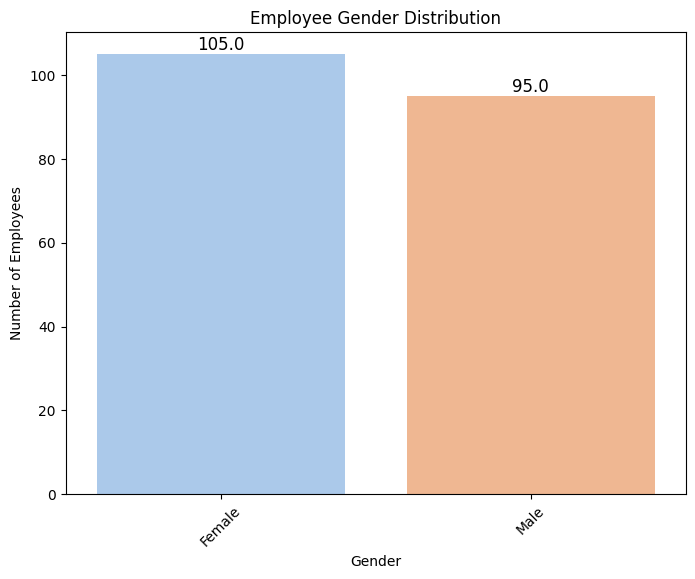

In [67]:
gender_counts = employees_df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
plt.title('Employee Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

### Distribution of Employees across different Department

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\1329288499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=role_counts.index, y=role_counts.values, palette='Set2')


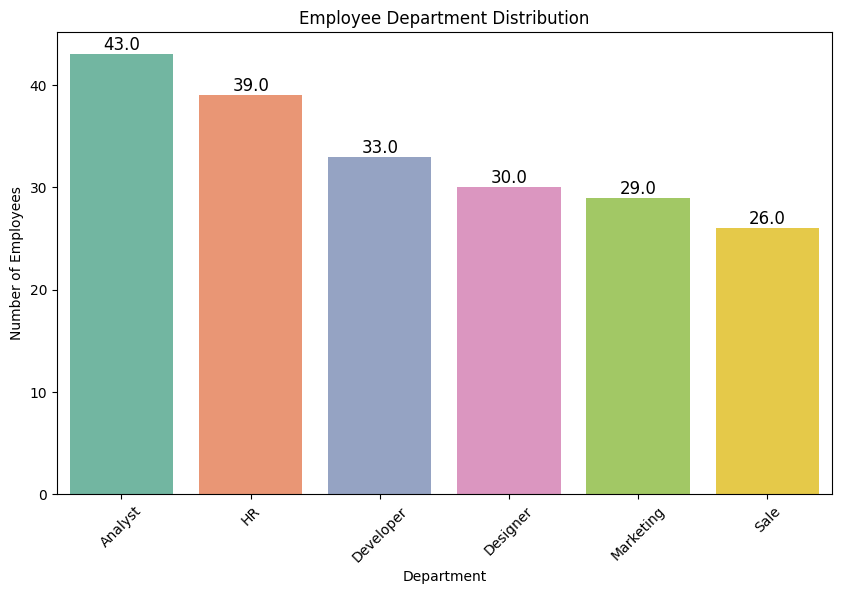

In [66]:
role_counts = employees_df['Department'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=role_counts.index, y=role_counts.values, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
plt.title('Employee Department Distribution')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

### Distribution of Employees across different Designation

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\1573346798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=role_counts.index, y=role_counts.values, palette='Set2')


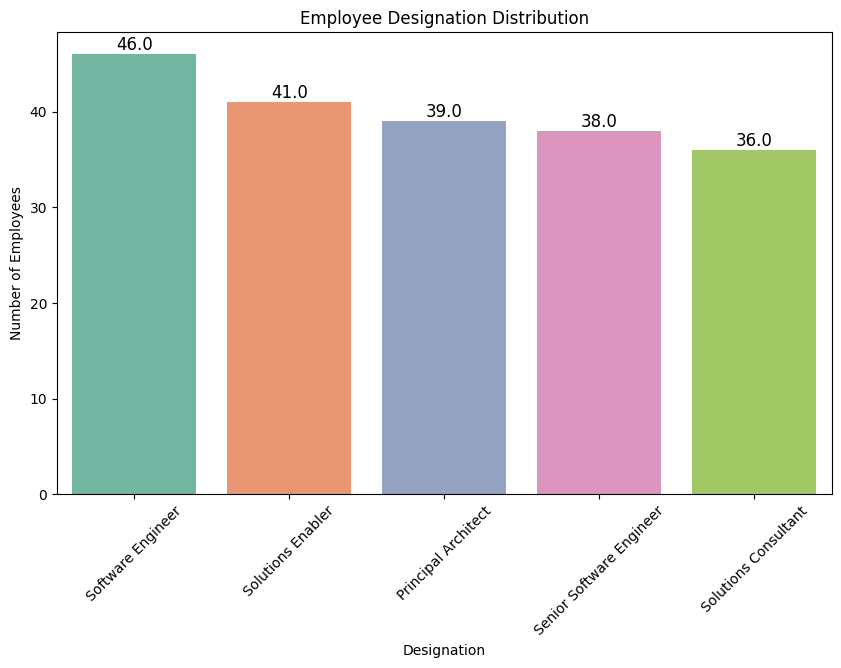

In [75]:
role_counts = employees_df['Designation'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=role_counts.index, y=role_counts.values, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)
plt.title('Employee Designation Distribution')
plt.xlabel('Designation')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

### Average Score for each Training

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\2049872449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training_id', y='score', data=avg_scores, palette='Set2')


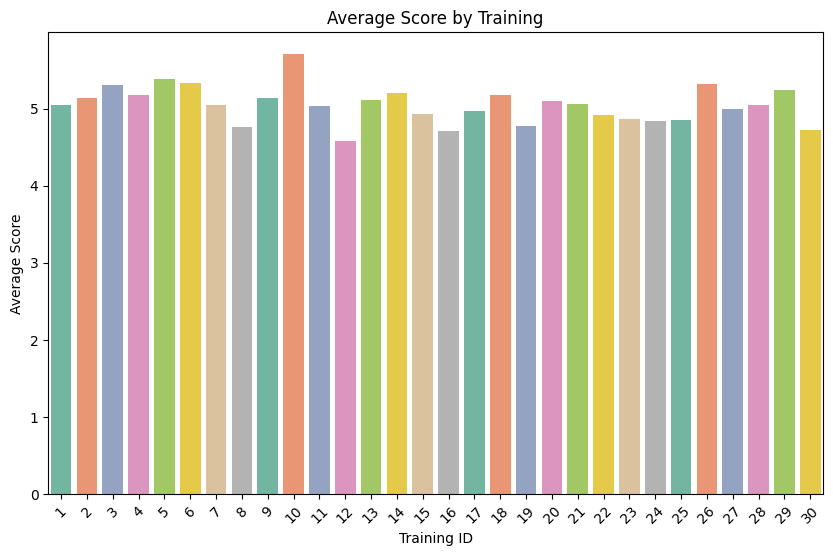

In [71]:
avg_scores = scores_df.groupby('Training_id')['score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Training_id', y='score', data=avg_scores, palette='Set2')
plt.title('Average Score by Training')
plt.xlabel('Training ID')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

### Average Score for each trainers

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\1155368226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='score', data=trainer_effectiveness, palette='rocket')


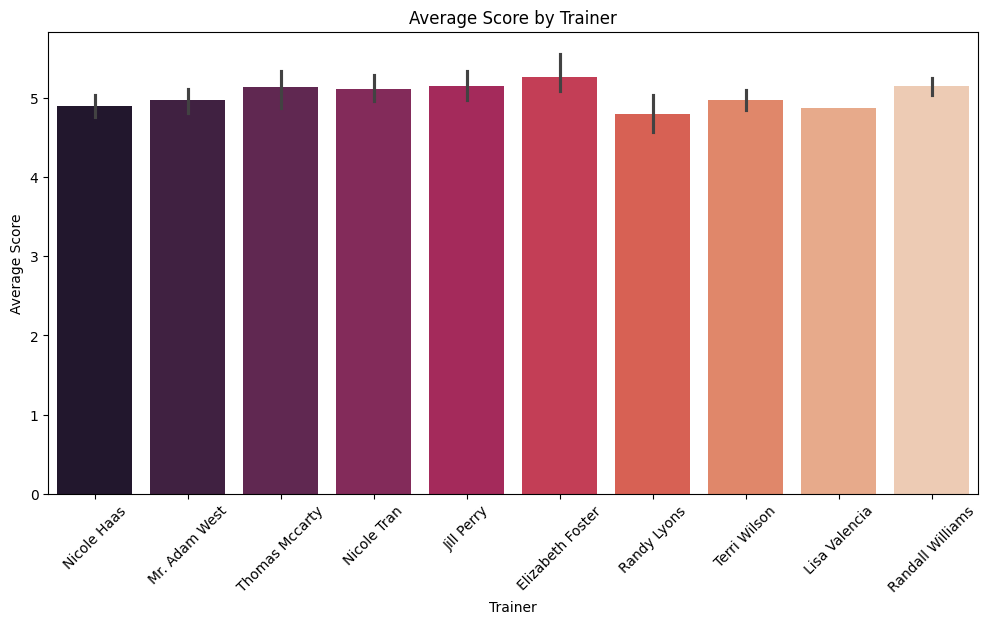

In [74]:
trainer_effectiveness = scores_df.groupby('Training_id')['score'].mean().reset_index()
trainer_effectiveness = trainer_effectiveness.merge(training_df[['training_id', 'Trainer_id']], left_on='Training_id', right_on='training_id')
trainer_effectiveness = trainer_effectiveness.merge(employees_df[['Emp_id', 'name']], left_on='Trainer_id', right_on='Emp_id')

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='score', data=trainer_effectiveness, palette='rocket')
plt.title('Average Score by Trainer')
plt.xlabel('Trainer')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

### Average Training Score by Domains

             domain     score
0  Data Engineering  5.096164
1      Data Science  5.047802
2        Full Stack  4.990971


C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\3294686202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='domain', y='score', data=data, palette='rocket')


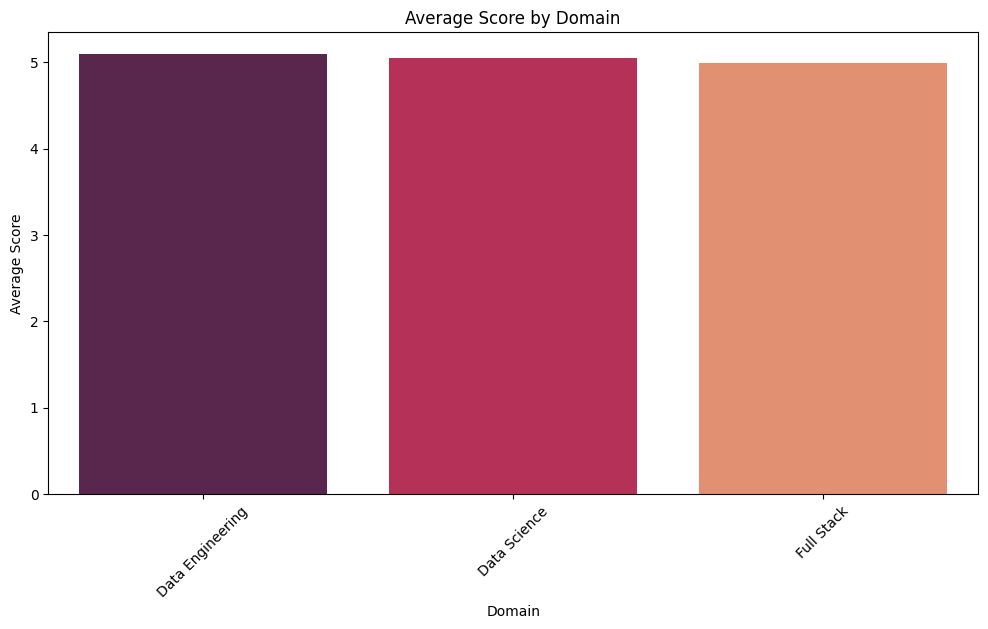

In [84]:
data = pd.read_csv(r'C:\Users\VenkataRishitha\Training\Final Project 30-09-2024\Data Engineering\Curated\curated_table.csv')
data = data.groupby('domain')['score'].mean().reset_index()
print(data)

plt.figure(figsize=(12, 6))
sns.barplot(x='domain', y='score', data=data, palette='rocket')
plt.title('Average Score by Domain')
plt.xlabel('Domain')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

### Distribution of Satisfaction levels

C:\Users\VenkataRishitha\AppData\Local\Temp\ipykernel_15924\291698576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Remark', y='Frequency', data=remarks_frequency, palette='viridis')


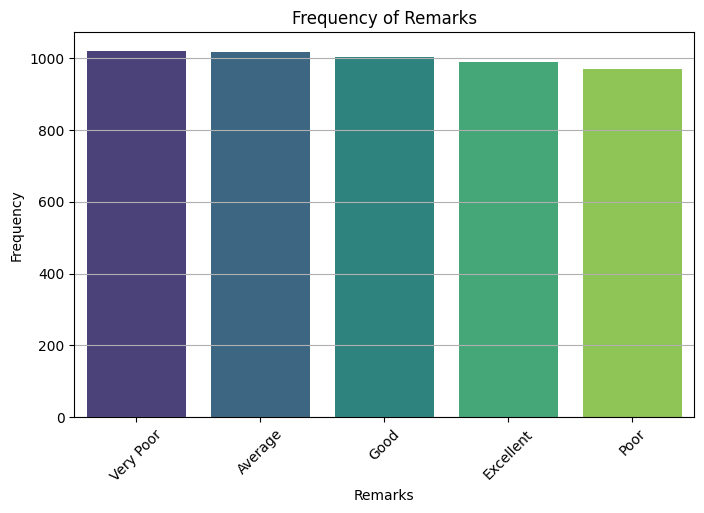

In [79]:
remarks_frequency = scores_df['remarks'].value_counts().reset_index()
remarks_frequency.columns = ['Remark', 'Frequency']

plt.figure(figsize=(8, 5))
sns.barplot(x='Remark', y='Frequency', data=remarks_frequency, palette='viridis')
plt.title('Frequency of Remarks')
plt.xlabel('Remarks')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()